In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volu

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


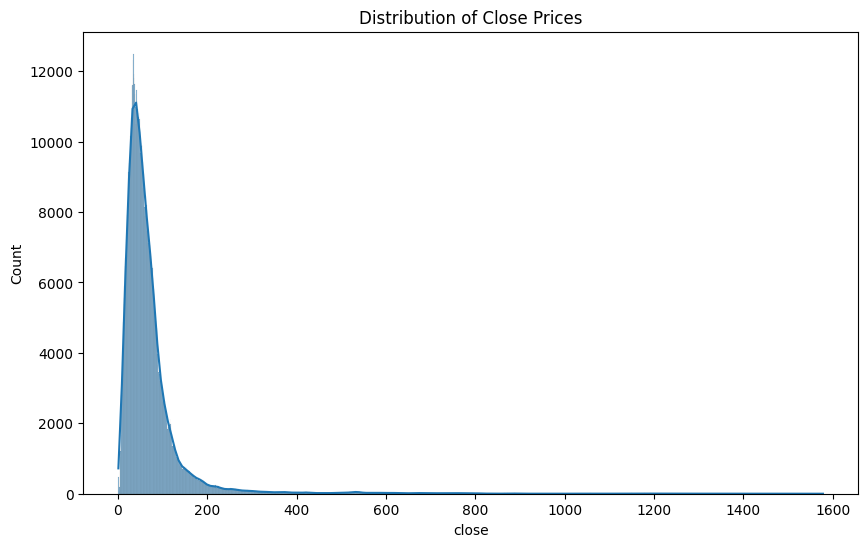

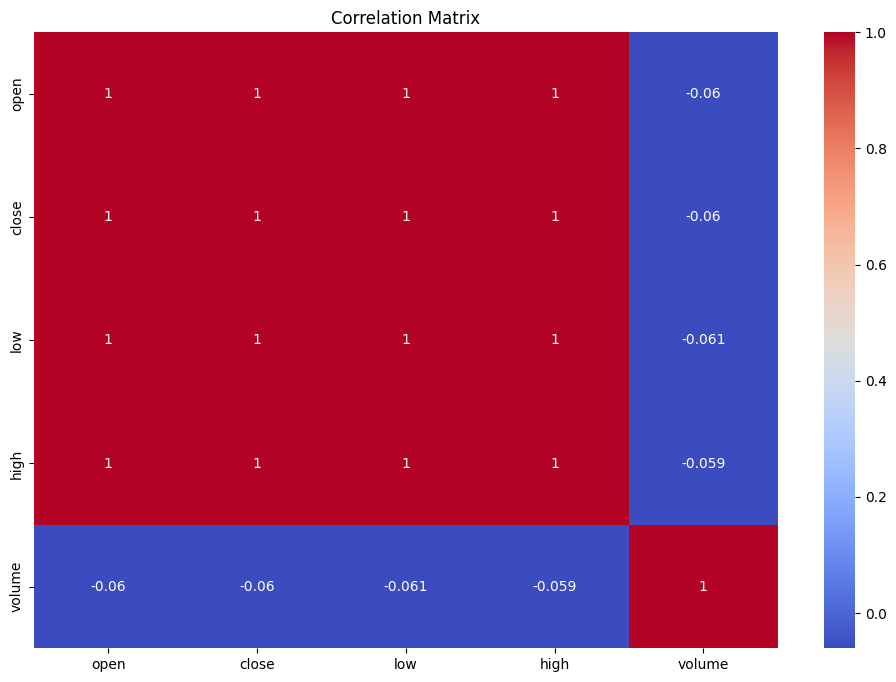

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/nyse/prices.csv")

# Display the first few rows
print(df.head())

# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable (e.g., 'close' price)
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], kde=True)
plt.title("Distribution of Close Prices")
plt.show()

# Exclude non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Epoch [1/50], Train Loss: 287.4246, Test Loss: 0.9252
Epoch [2/50], Train Loss: 1.0303, Test Loss: 0.8853
Epoch [3/50], Train Loss: 0.9752, Test Loss: 1.0421
Epoch [4/50], Train Loss: 0.9127, Test Loss: 0.7785
Epoch [5/50], Train Loss: 0.8745, Test Loss: 0.7674
Epoch [6/50], Train Loss: 0.8234, Test Loss: 0.6837
Epoch [7/50], Train Loss: 0.7858, Test Loss: 0.6396
Epoch [8/50], Train Loss: 0.7483, Test Loss: 0.7857
Epoch [9/50], Train Loss: 0.7217, Test Loss: 0.5903
Epoch [10/50], Train Loss: 0.6985, Test Loss: 0.7705
Epoch [11/50], Train Loss: 0.6578, Test Loss: 0.6283
Epoch [12/50], Train Loss: 0.6425, Test Loss: 0.5531
Epoch [13/50], Train Loss: 0.6199, Test Loss: 0.6160
Epoch [14/50], Train Loss: 0.5999, Test Loss: 0.5532
Epoch [15/50], Train Loss: 0.5829, Test Loss: 0.5705
Epoch [16/50], Train Loss: 0.5885, Test Loss: 0.4794
Epoch [17/50], Train Loss: 0.5650, Test Loss: 0.4750
Epoch [18/50], Train Loss: 0.5633, Test Loss: 0.4657
Epoch [19/50], Train Loss: 0.5546, Test Loss: 0.4370


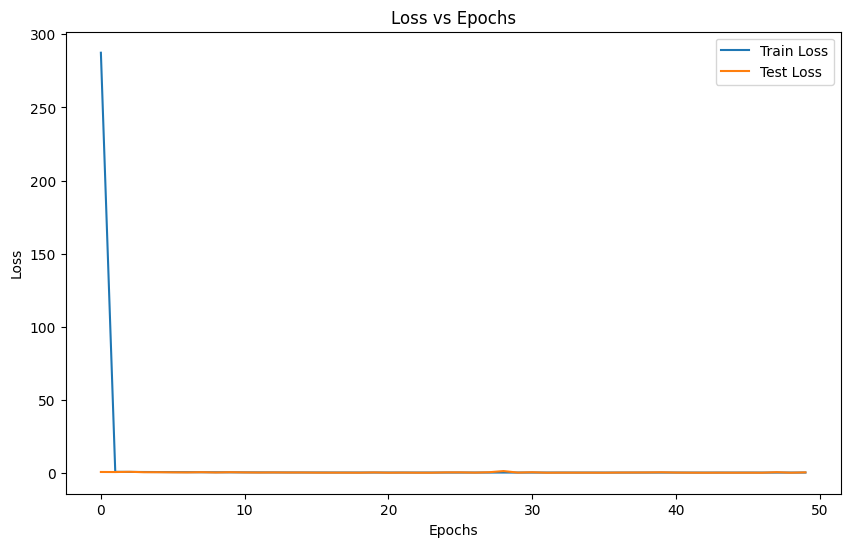

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df.drop(columns=['close', 'date', 'symbol']).values  # Features
y = df['close'].values  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network architecture
class RegressionNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = RegressionNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss.item():.4f}")

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Définir la grille des paramètres
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [50, 100, 200]
}

# Initialiser le modèle MLPRegressor
mlp = MLPRegressor(random_state=42)

# Effectuer la recherche exhaustive avec GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train.numpy().ravel())

# Afficher les meilleurs paramètres
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'max_iter': 100}


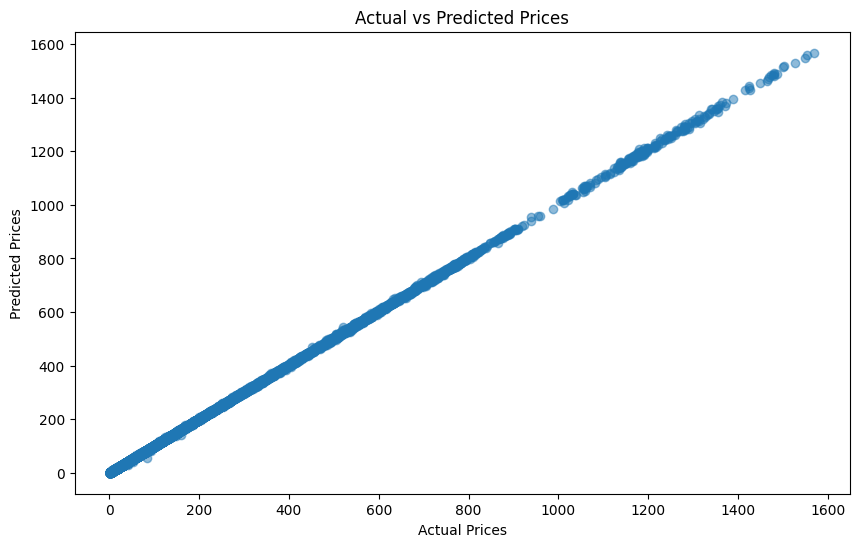

In [9]:
# Plot predicted vs actual values
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Epoch [1/50], Train Loss: 546.1029, Test Loss: 2.8630
Epoch [2/50], Train Loss: 179.2726, Test Loss: 10.2094
Epoch [3/50], Train Loss: 169.8601, Test Loss: 3.9946
Epoch [4/50], Train Loss: 158.4346, Test Loss: 1.8356
Epoch [5/50], Train Loss: 154.7702, Test Loss: 2.9893
Epoch [6/50], Train Loss: 151.7553, Test Loss: 5.1252
Epoch [7/50], Train Loss: 152.2872, Test Loss: 8.1782
Epoch [8/50], Train Loss: 152.3434, Test Loss: 5.1010
Epoch [9/50], Train Loss: 149.1159, Test Loss: 3.1650
Epoch [10/50], Train Loss: 153.5057, Test Loss: 7.3586
Epoch [11/50], Train Loss: 149.4931, Test Loss: 8.0809
Epoch [12/50], Train Loss: 149.7567, Test Loss: 4.0923
Epoch [13/50], Train Loss: 146.8411, Test Loss: 3.2605
Epoch [14/50], Train Loss: 146.3197, Test Loss: 12.9897
Epoch [15/50], Train Loss: 150.8593, Test Loss: 3.1450
Epoch [16/50], Train Loss: 148.2804, Test Loss: 2.8415
Epoch [17/50], Train Loss: 148.6424, Test Loss: 4.5441
Epoch [18/50], Train Loss: 148.4389, Test Loss: 7.4430
Epoch [19/50], Tr

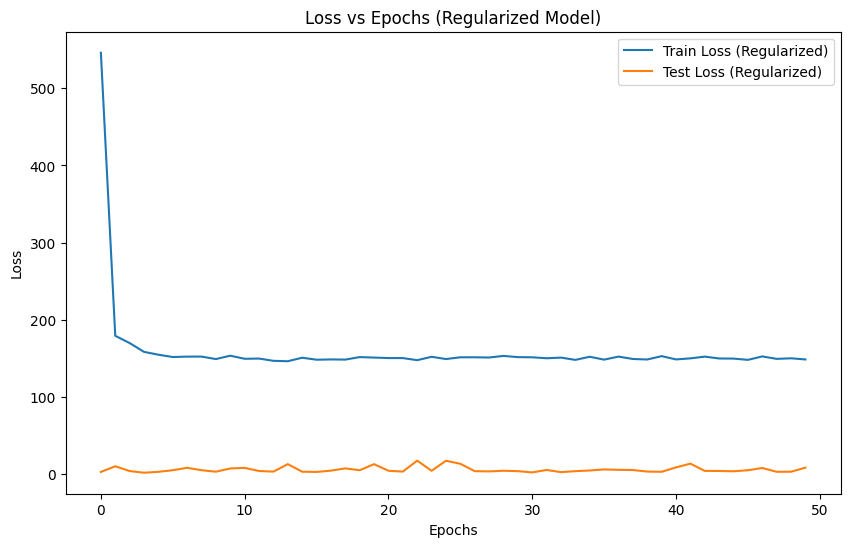

In [10]:
# Updated model with Dropout and L2 regularization
import torch.nn as nn

class RegularizedRegressionNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(RegularizedRegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Initialize the regularized model
model_reg = RegularizedRegressionNN(input_size, hidden_size, output_size, dropout_rate=0.5)

# Define loss function and optimizer with L2 regularization
optimizer_reg = optim.Adam(model_reg.parameters(), lr=0.001, weight_decay=0.01)

# Training loop for the regularized model
train_losses_reg = []
test_losses_reg = []

for epoch in range(num_epochs):
    model_reg.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer_reg.zero_grad()
        outputs = model_reg(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer_reg.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses_reg.append(train_loss)
    
    # Evaluate on test data
    model_reg.eval()
    with torch.no_grad():
        test_outputs = model_reg(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses_reg.append(test_loss.item())
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss.item():.4f}")

# Plot the loss curves for the regularized model
plt.figure(figsize=(10, 6))
plt.plot(train_losses_reg, label="Train Loss (Regularized)")
plt.plot(test_losses_reg, label="Test Loss (Regularized)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (Regularized Model)")
plt.legend()
plt.show()